# Mehrdad Baradaran

### Assignment 4

### Cifar10_Reconstruction

### 99222020

In this series of exercises, we try to train 50,000 photos from 10 classes. To implement the neural network, we use convolution and pooling layers to have fewer parameters so that we can train easily. In addition, we check the effects of the number of blocks and hidden layers and use dropout and early stopping methods to obtain higher accuracy and display these changes in the graph. Let's go to start!.

# Import Needed Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from packaging import version

%matplotlib inline

# Load Cifar10 Dataset

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


# Check for Shapes and Types

In [3]:
train_x.shape, train_x.dtype, type(train_x)

((50000, 32, 32, 3), dtype('uint8'), numpy.ndarray)

In [4]:
test_x.shape, test_x.dtype, type(test_x)

((10000, 32, 32, 3), dtype('uint8'), numpy.ndarray)

# Plot some pics of CIFAR_10 Dataset

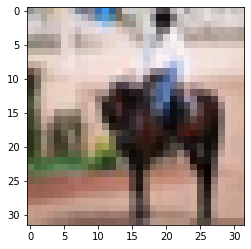

In [5]:
plt.imshow(train_x[11])

In [6]:
train_y[11]

array([7], dtype=uint8)

# Normalize Data

Inputs between 0 and 1 . type shoud be float32

In [7]:
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [8]:
train_x.shape, train_x.max(), train_x.min(), train_x.dtype

((50000, 32, 32, 3), 1.0, 0.0, dtype('float32'))

In [9]:
test_x.shape, test_x.max(), test_x.min(), test_x.dtype

((10000, 32, 32, 3), 1.0, 0.0, dtype('float32'))

# Input Image

Take 1000 images from CIFAR10. Then, given a pair of images from CIFAR10 𝑥1 and 𝑥2, build a
network that can return both images given their average (𝑥1+𝑥2)/2 as the only input.

In [10]:
subtrain_x = train_x[10500:10800]
subtrain_x2 = train_x[47000:47300]
labels1 = []
labels2 = []
avg_input = []
for i in range(300):
    for j in range(i,300):
        labels1.append(subtrain_x[i])
        labels2.append(subtrain_x2[j])
        avg_input.append((subtrain_x[i]+subtrain_x2[j])/2)
        
print(len(labels1))
print(len(avg_input))

45150
45150


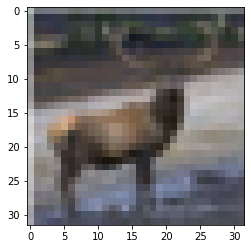

In [11]:
plt.imshow(labels1[0])
plt.show()

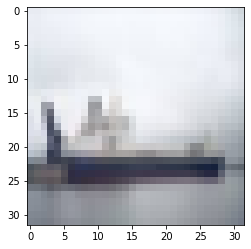

In [12]:
plt.imshow(labels2[0])
plt.show()

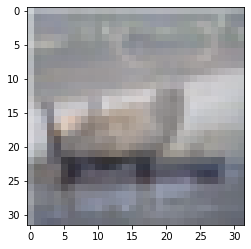

In [13]:
plt.imshow(avg_input[0])
plt.show()

In [14]:
type(train_x), type(avg_input)

(numpy.ndarray, list)

In [15]:
avg_input = np.array(avg_input)
labels1 = np.array(labels1)
labels2 = np.array(labels2)

In [16]:
type(avg_input)

numpy.ndarray

In [17]:
avg_input.shape

(45150, 32, 32, 3)

# Create AutoEncoder Model Architecture


#### Import Layers

In [18]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPooling2D, Conv2D, ReLU, Activation, UpSampling2D, Conv2DTranspose, concatenate, BatchNormalization
import tensorflow_probability as tfp 
from tensorflow.keras.layers import Lambda, InputLayer, Flatten, Reshape, MaxPool2D, LeakyReLU, add


In [33]:
#Input Layer
input = Input(shape=(32, 32, 3))


conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
encoder = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

#decoder1

up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(encoder), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
decoder = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv9)

#decoder2
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(encoder), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
decoder2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv9)

# Create Final Model

#### summary of model

In [34]:
autoencode_model = Model(input, [decoder, decoder2])
autoencode_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 32, 32, 32)   9248        ['conv2d_28[0][0]']              
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 16, 16, 32)  0           ['conv2d_29[0][0]']              
                                                                                            

# Plot Graph



For Better visualization we plot graph of our model
But first we should train our model

In [35]:
%load_ext tensorboard

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Compile and Train Model

In [36]:
from keras.optimizers import Adam

In [37]:
autoencode_model.compile(optimizer=Adam(0.0005), loss='mse')

#### Using EarlyStopping Method

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)


# Create test data

In [40]:
subtest_x = test_x[9500:9600]
subtest_x2 = test_x[7000:7100]
test_labels1 = []
test_labels2 = []
test_input = []
for i in range(100):
    for j in range(i,100):
        test_labels1.append(subtest_x[i])
        test_labels2.append(subtest_x2[j])
        test_input.append((subtest_x[i]+subtest_x2[j])/2)
        
print(len(test_labels1))
print(len(test_input))

5050
5050


In [41]:
test_input = np.array(test_input)
test_labels1 = np.array(test_labels1)
test_labels2 = np.array(test_labels2)

## Fit Model


In [42]:
autoencode_model.fit(avg_input, [labels1, labels2], epochs=80, batch_size=128, 
                        validation_data=(test_input, [test_labels1, test_labels2]), callbacks=[tensorboard_callback])

Epoch 1/80
353/353 [==============================] - 39s 98ms/step - loss: 0.0716 - conv2d_46_loss: 0.0357 - conv2d_55_loss: 0.0359 - val_loss: 0.0602 - val_conv2d_46_loss: 0.0303 - val_conv2d_55_loss: 0.0299
Epoch 2/80
353/353 [==============================] - 32s 91ms/step - loss: 0.0449 - conv2d_46_loss: 0.0223 - conv2d_55_loss: 0.0226 - val_loss: 0.0705 - val_conv2d_46_loss: 0.0354 - val_conv2d_55_loss: 0.0351
Epoch 3/80
353/353 [==============================] - 32s 91ms/step - loss: 0.0250 - conv2d_46_loss: 0.0123 - conv2d_55_loss: 0.0127 - val_loss: 0.0693 - val_conv2d_46_loss: 0.0348 - val_conv2d_55_loss: 0.0345
Epoch 4/80
353/353 [==============================] - 32s 91ms/step - loss: 0.0176 - conv2d_46_loss: 0.0087 - conv2d_55_loss: 0.0089 - val_loss: 0.0718 - val_conv2d_46_loss: 0.0357 - val_conv2d_55_loss: 0.0361
Epoch 5/80
353/353 [==============================] - 32s 91ms/step - loss: 0.0133 - conv2d_46_loss: 0.0067 - conv2d_55_loss: 0.0066 - val_loss: 0.0744 - val_co

# Plot Loss

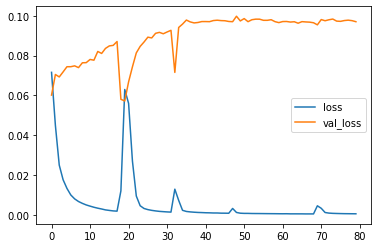

In [43]:
model_history = pd.DataFrame(autoencode_model.history.history)
model_history[['loss', 'val_loss']].plot()

# Graph of Model

In [ ]:
%tensorboard --logdir logs

# Prediction Tests

In [44]:
autoencode_model.evaluate(test_input, [test_labels1, test_labels2])

158/158 [==============================] - 3s 14ms/step - loss: 0.0970 - conv2d_46_loss: 0.0469 - conv2d_55_loss: 0.0501


[0.09704641997814178, 0.04691794887185097, 0.05012847110629082]

In [45]:
predictions = autoencode_model.predict(test_input)

158/158 [==============================] - 2s 11ms/step


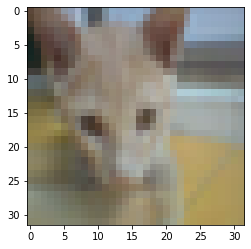

In [47]:
plt.imshow(test_labels1[512])

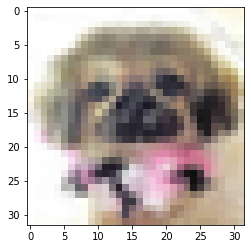

In [48]:
plt.imshow(test_labels2[512])

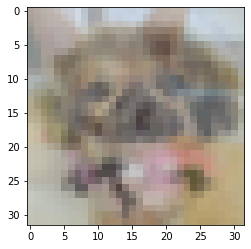

In [49]:
plt.imshow(test_input[512])

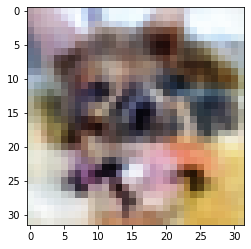

In [50]:
plt.imshow(predictions[0][512])

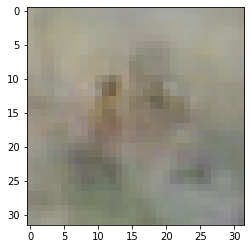

In [51]:
plt.imshow(predictions[1][512])